In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import warnings


In [3]:
# Veri setini yükle
df = pd.read_csv("Expanded_data_with_more_features.csv")
df=pd.DataFrame(df)

#Sütun analiz ve istatistikleri

In [4]:
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [5]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [6]:
df.tail()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93
30640,960,male,group B,some college,standard,none,married,never,no,1.0,school_bus,5 - 10,64,60,58


In [7]:
df.dtypes

Unnamed: 0               int64
Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object

In [50]:
# Sütun adını değiştirme
df.rename(columns={"Unnamed:0": "StudentID"}, inplace=True)

# Sonucu kontrol etmek için veri setini görüntüleme
print(df.head())


   Unnamed: 0  Gender  EthnicGroup  ParentEduc  LunchType  TestPrep  \
0           0       0            5           1          1         1   
1           1       0            2           4          1         2   
2           2       0            1           3          1         1   
3           3       1            0           0          0         1   
4           4       1            2           4          1         1   

   ParentMaritalStatus  PracticeSport  IsFirstChild  NrSiblings  \
0                    1              1             1         3.0   
1                    1              2             1         0.0   
2                    2              2             1         4.0   
3                    1              0             0         1.0   
4                    1              2             1         0.0   

   TransportMeans  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0               1               1         71            71            74  
1               2   

In [49]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

In [9]:
# Sütunda kaç tane null değer olduğunu döndürür
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

<Axes: >

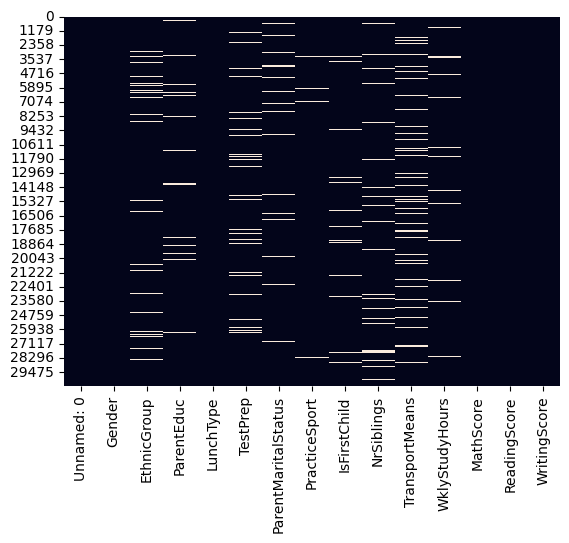

In [10]:
sns.heatmap(df.isnull(),cbar=False)

In [11]:
print(df.isnull().sum().sort_values(ascending=False))

TransportMeans         3134
ParentEduc             1845
EthnicGroup            1840
TestPrep               1830
NrSiblings             1572
ParentMaritalStatus    1190
WklyStudyHours          955
IsFirstChild            904
PracticeSport           631
Unnamed: 0                0
Gender                    0
LunchType                 0
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64


In [12]:
# Tüm sütunların istatistiklerini hesapla
statistics = df.describe(include='all')
print(statistics)

          Unnamed: 0  Gender EthnicGroup    ParentEduc LunchType TestPrep  \
count   30641.000000   30641       28801         28796     30641    28811   
unique           NaN       2           5             6         2        2   
top              NaN  female     group C  some college  standard     none   
freq             NaN   15424        9212          6633     19905    18856   
mean      499.556607     NaN         NaN           NaN       NaN      NaN   
std       288.747894     NaN         NaN           NaN       NaN      NaN   
min         0.000000     NaN         NaN           NaN       NaN      NaN   
25%       249.000000     NaN         NaN           NaN       NaN      NaN   
50%       500.000000     NaN         NaN           NaN       NaN      NaN   
75%       750.000000     NaN         NaN           NaN       NaN      NaN   
max       999.000000     NaN         NaN           NaN       NaN      NaN   

       ParentMaritalStatus PracticeSport IsFirstChild    NrSiblings  \
coun

In [13]:
# Sütunların veri tiplerini ve eksik değerlerini göster
data_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [14]:
df.nunique()

Unnamed: 0             1000
Gender                    2
EthnicGroup               5
ParentEduc                6
LunchType                 2
TestPrep                  2
ParentMaritalStatus       4
PracticeSport             3
IsFirstChild              2
NrSiblings                8
TransportMeans            2
WklyStudyHours            3
MathScore                95
ReadingScore             90
WritingScore             93
dtype: int64



---

#Veri Ön İşleme

In [15]:
#Yinelenen satırları kaldırma
df.drop_duplicates()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [17]:
df.isnull().sum()

Unnamed: 0             0
Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

<Axes: >

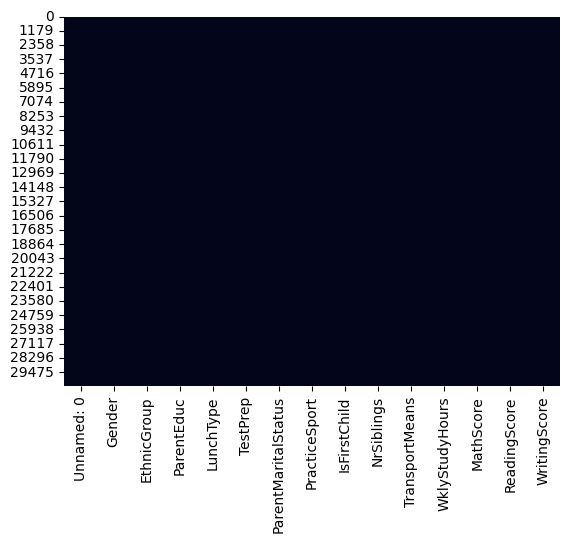

In [20]:
#Kontrol
sns.heatmap(df.isnull(),cbar=False)

In [16]:
#Label Encoding 
label_encoder = LabelEncoder()
string_columns = df.select_dtypes(include=['object']).columns
df[string_columns] = df[string_columns].apply(label_encoder.fit_transform)

# Integer değerlere ortalama ile eksik değerleri doldurma
integer_columns = df.select_dtypes(include=['int', 'float']).columns
df[integer_columns] = df[integer_columns].fillna(df[integer_columns].mean())
        
# String değerlere "Bilinmiyor" ile eksik değerleri doldurma
string_columns = df.select_dtypes(include=['object']).columns
df[string_columns] = df[string_columns].fillna("Bilinmiyor")

In [19]:
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,0,5,1,1,1,1,1,1,3.0,1,1,71,71,74
1,1,0,2,4,1,2,1,2,1,0.0,2,0,69,90,88
2,2,0,1,3,1,1,2,2,1,4.0,1,1,87,93,91
3,3,1,0,0,0,1,1,0,0,1.0,2,0,45,56,42
4,4,1,2,4,1,1,1,2,1,0.0,1,0,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,0,3,2,1,1,2,2,0,2.0,1,0,59,61,65
30637,890,1,4,2,1,1,2,1,0,1.0,0,0,58,53,51
30638,911,0,5,2,0,0,1,2,0,1.0,0,0,61,70,67
30639,934,0,3,0,1,0,1,1,0,3.0,1,0,82,90,93


# Model Tasarımı 

In [37]:
# Bağımsız değişkenler
X = df[["Gender", "WklyStudyHours", "TestPrep"]]

# Bağımlı değişkenler
y = df[["MathScore", "ReadingScore", "WritingScore"]]

# Kategorik değişkenleri kodlama
X_encoded = pd.get_dummies(X, drop_first=True)

# Veri setini eğitim ve test veri setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Polinomal özellikler oluşturma
poly = PolynomialFeatures(degree=2,include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Polinomal regresyon modelini tanımlama
model = LinearRegression()

# Hyperparameter grid'i tanımlama
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'copy_X': [True, False]
}

# Grid Search kullanarak hyperparameter tuning yapma
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_poly, y_train)

# En iyi parametreleri ve skoru yazdırma
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor (negatif ortalama kare hatası):", grid_search.best_score_)

# En iyi modeli seçme
best_model = grid_search.best_estimator_

# Test veri seti üzerinde tahmin yapma
y_pred = best_model.predict(X_test_poly)

# Performans metriklerini hesaplama
mse = mean_squared_error(y_test, y_pred)

print("Ortalama Kare Hatası (MSE):", mse)




En iyi parametreler: {'copy_X': True, 'fit_intercept': True, 'positive': False}
En iyi skor (negatif ortalama kare hatası): -207.78778676022193
Ortalama Kare Hatası (MSE): 202.25995773952934


# Yazılım Ürün Tasarımı

In [40]:
# Test veri seti üzerinde tahmin yapma
y_pred = best_model.predict(X_test_poly)

# Tahmin sonuçlarını DataFrame'e dönüştürme
prediction_df = pd.DataFrame(y_pred, columns=["Predicted_MathScore", "Predicted_ReadingScore", "Predicted_WritingScore"])

# Gerçek değerler ile tahminleri birleştirme
result_df = pd.concat([y_test.reset_index(drop=True), prediction_df], axis=1)

# Raporlama
print("Sonuçlar:")
print(result_df.head())

# Performans metriklerini hesaplama
mse_math = mean_squared_error(y_test["MathScore"], y_pred[:, 0])
mse_reading = mean_squared_error(y_test["ReadingScore"], y_pred[:, 1])
mse_writing = mean_squared_error(y_test["WritingScore"], y_pred[:, 2])

print("Ortalama Kare Hatası (MSE) - MathScore:", mse_math)
print("Ortalama Kare Hatası (MSE) - ReadingScore:", mse_reading)
print("Ortalama Kare Hatası (MSE) - WritingScore:", mse_writing)


Sonuçlar:
   MathScore  ReadingScore  WritingScore  Predicted_MathScore  \
0         70            87            87            65.985864   
1         90            83            84            72.218834   
2         81            89            81            68.142237   
3         55            57            55            62.696876   
4         49            50            53            72.218834   

   Predicted_ReadingScore  Predicted_WritingScore  
0               76.434480               78.245553  
1               70.373084               70.362374  
2               65.329805               63.169771  
3               70.768607               69.630105  
4               70.373084               70.362374  
Ortalama Kare Hatası (MSE) - MathScore: 220.0765251536545
Ortalama Kare Hatası (MSE) - ReadingScore: 191.94489273353128
Ortalama Kare Hatası (MSE) - WritingScore: 194.75845533140355


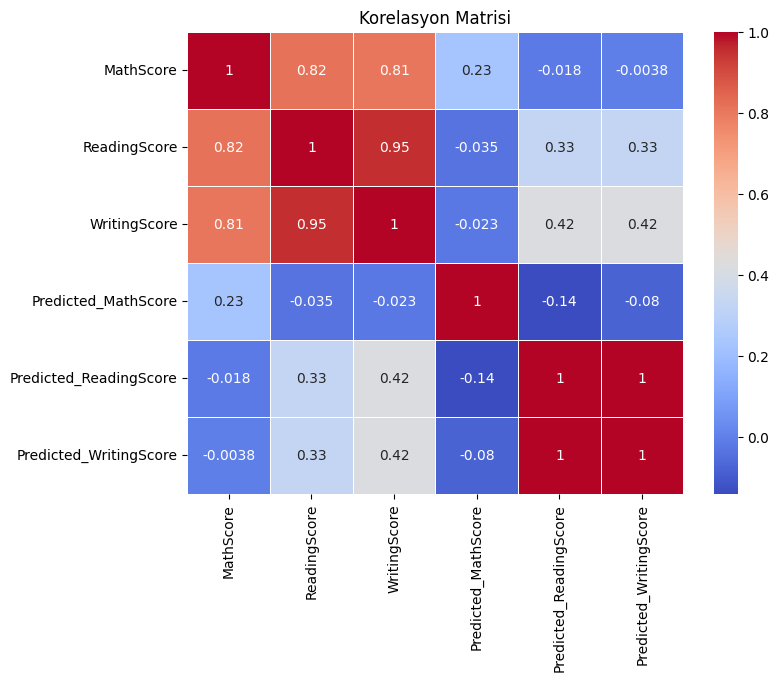

In [41]:
# Korelasyon matrisini oluşturma
correlation_matrix = result_df.corr()

# Heatmap oluşturma
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.show()

#Açıklanabilir yapay zeka teknikleri uygulama


In [52]:

# Öğrenci performans değerlendirme aracı
student_id = 1  # Örnek öğrenci ID'si
student_scores = result_df[result_df.index == student_id][["MathScore", "ReadingScore", "WritingScore"]].values.flatten()
student_predictions = result_df[result_df.index == student_id][["Predicted_MathScore", "Predicted_ReadingScore", "Predicted_WritingScore"]].values.flatten()

print("Öğrenci Performansı:")
print("Gerçek Değerler:", student_scores)
print("Tahmin Edilen Değerler:", student_predictions)

Öğrenci Performansı:
Gerçek Değerler: [90 83 84]
Tahmin Edilen Değerler: [72.21883388 70.37308365 70.36237419]


In [53]:
!mkdir .github
!mkdir .github/workflows



# SORU 4
#Dersin Geri Bildirimi
I. Derste konuyu pekiştirmek adına yaptığımız uygulamalar güzeldi. Öğrendiklerimizin 
akılda kalmasında etkili oldu. Ayrıca kahoot dersi daha eğlenceli kılıyordu.

II. Türkçe kaynakların arttırılmasının işimizi kolaylaştıracağını düşünüyorum.

III. Ders süresi iyileştirilebilir.